<a href="https://colab.research.google.com/github/PrabishaPradeep/Dsa/blob/main/Prabisha_Exit_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exit Test

### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

### Read the dataset into python environment

In [2]:
df=pd.read_csv("/content/train_exit.csv")
pd.set_option('display.max_columns',None)
df

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,dribbling_skills,shot_accuracy,body_strength_stamina,max_running_speed,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,59.0,41.0,73.0,13.0,69.0,70.0,36.0,50.0,72.0,24.4,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,62.0,53.0,43.0,10.0,30.0,50.0,30.0,53.0,54.0,22.6,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,69.0,49.0,45.0,10.0,57.0,37.0,18.0,NaN,66.0,23.2,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,86.0,81.0,80.0,3.0,85.0,80.0,40.0,79.0,78.0,21.2,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,57.0,49.0,35.0,9.0,60.0,39.0,34.0,35.0,56.0,23.4,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13989,PLID_10956,Viva Stepney,20,M,Uruguay,6'0,161lbs,60.0,48.0,62.0,60.0,40.0,61.0,10.0,63.0,58.0,30.0,48.0,66.0,18.9,Right,6.0,NaN,7.6,2.0,Medium,Academy,6.0,0.0,1
13990,PLID_17290,Illa Pitre,18,F,England,5'10,165lbs,53.0,68.0,59.0,73.0,24.0,55.0,11.0,52.0,46.0,20.0,34.0,60.0,24.9,Right,5.3,0.0,5.6,3.0,Medium,Academy,4.0,0.0,0
13991,PLID_5193,Marylouise Mosley,17,M,Japan,6'0,172lbs,56.0,73.0,62.0,50.0,47.0,64.0,10.0,58.0,56.0,28.0,49.0,72.0,28.5,Left,5.7,0.0,7.7,3.0,Low,Talent Hunt,2.0,0.0,1
13992,PLID_12173,Teri Escamilla,20,F,Ukraine,5'10,150lbs,71.0,69.0,70.0,51.0,56.0,59.0,9.0,42.0,70.0,38.0,57.0,49.0,25.5,Left,6.8,1.0,5.8,4.0,Medium,Academy,6.0,0.0,1


# Exploratory Data Analysis

### Check basic information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13975 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13577 non-null  object 
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

***Dataset has 29 features and 13994 entries. Among that, 21 features are numerical (19 float and 2 integer) and 9 are categorical features.***

### Check statistical summary

In [4]:
df.describe()

,age,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,dribbling_skills,shot_accuracy,body_strength_stamina,max_running_speed,behaviour_rating,matches_played,fitness_rating,trophies_won,years_of_experience,no_of_disqualifications,selection
count,13994.000000,13581.000000,13994.000000,13994.000000,13970.000000,13964.000000,13966.000000,13994.000000,13994.000000,13994.000000,13994.000000,13422.000000,13994.000000,13994.000000,13291.000000,13328.000000,13299.000000,13994.000000,13850.000000,13994.000000,13994.000000
mean,21.135844,56.043958,61.934329,62.753323,63.612026,48.495703,56.768366,16.474632,48.108118,52.935973,28.536730,47.178140,62.652780,23.586094,5.822068,3.908463,6.405482,3.389095,6.434152,-4.740675,0.557525
std,5.162719,16.787353,14.931963,14.203638,11.938712,15.767506,11.977744,16.874551,16.821929,14.201782,9.735249,15.803991,11.512526,5.194387,1.095702,13.583229,1.706983,1.709152,4.450954,72.023656,0.496698
min,16.000000,5.000000,12.000000,9.000000,14.000000,7.000000,9.000000,1.000000,9.000000,13.000000,2.000000,7.000000,15.000000,5.400000,2.100000,0.000000,1.000000,0.000000,1.000000,-999.000000,0.000000
25%,17.000000,51.000000,54.000000,55.000000,57.000000,39.000000,49.000000,10.000000,36.000000,45.000000,25.000000,38.000000,56.000000,21.100000,5.100000,0.000000,5.600000,2.000000,2.000000,0.000000,0.000000
50%,20.000000,61.000000,64.000000,65.000000,64.000000,49.000000,58.000000,11.000000,52.000000,56.000000,31.000000,50.000000,64.000000,24.600000,5.900000,0.000000,6.800000,3.000000,6.000000,0.000000,1.000000
75%,24.000000,67.000000,72.000000,73.000000,72.000000,60.000000,65.000000,12.000000,61.000000,63.000000,35.000000,59.000000,71.000000,27.100000,6.500000,1.000000,7.500000,5.000000,10.000000,0.000000,1.000000
max,61.000000,95.000000,96.000000,97.000000,95.000000,92.000000,92.000000,88.000000,86.000000,89.000000,50.000000,86.000000,92.000000,35.000000,9.800000,151.000000,10.000000,9.000000,26.000000,25.000000,1.000000


### Check for unique values

In [5]:
(df.nunique()).sort_values(ascending=False)

player_id                    13994
name                         13994
max_running_speed              166
country                        163
ball_controlling_skills         89
weight                          88
body_balance                    86
penalties_conversion_rate       86
fitness_rating                  85
body_reflexes                   84
mental_strength                 83
shot_accuracy                   79
defending_skills                78
passing_skills                  77
jumping_skills                  74
body_strength_stamina           73
goalkeeping_skills              65
behaviour_rating                64
dribbling_skills                48
age                             39
height                          31
years_of_experience             25
matches_played                  18
no_of_disqualifications         17
trophies_won                    10
coaching                         4
strong_foot                      3
dedication_level                 3
gender              

***Features 'player_id' and 'name' have full of unique values.***

### Check for duplicates

In [6]:
df.duplicated().sum()

0

***There are no duplicate entries in the dataset.***

### Check for null values

In [7]:
df.isnull().sum().sort_values(ascending=False)

strong_foot                  1833
behaviour_rating              703
fitness_rating                695
matches_played                666
shot_accuracy                 572
weight                        417
ball_controlling_skills       413
years_of_experience           144
coaching                      125
penalties_conversion_rate      30
mental_strength                28
jumping_skills                 24
gender                         19
player_id                       0
max_running_speed               0
dedication_level                0
no_of_disqualifications         0
trophies_won                    0
passing_skills                  0
body_strength_stamina           0
dribbling_skills                0
name                            0
defending_skills                0
goalkeeping_skills              0
body_balance                    0
body_reflexes                   0
height                          0
country                         0
age                             0
selection     

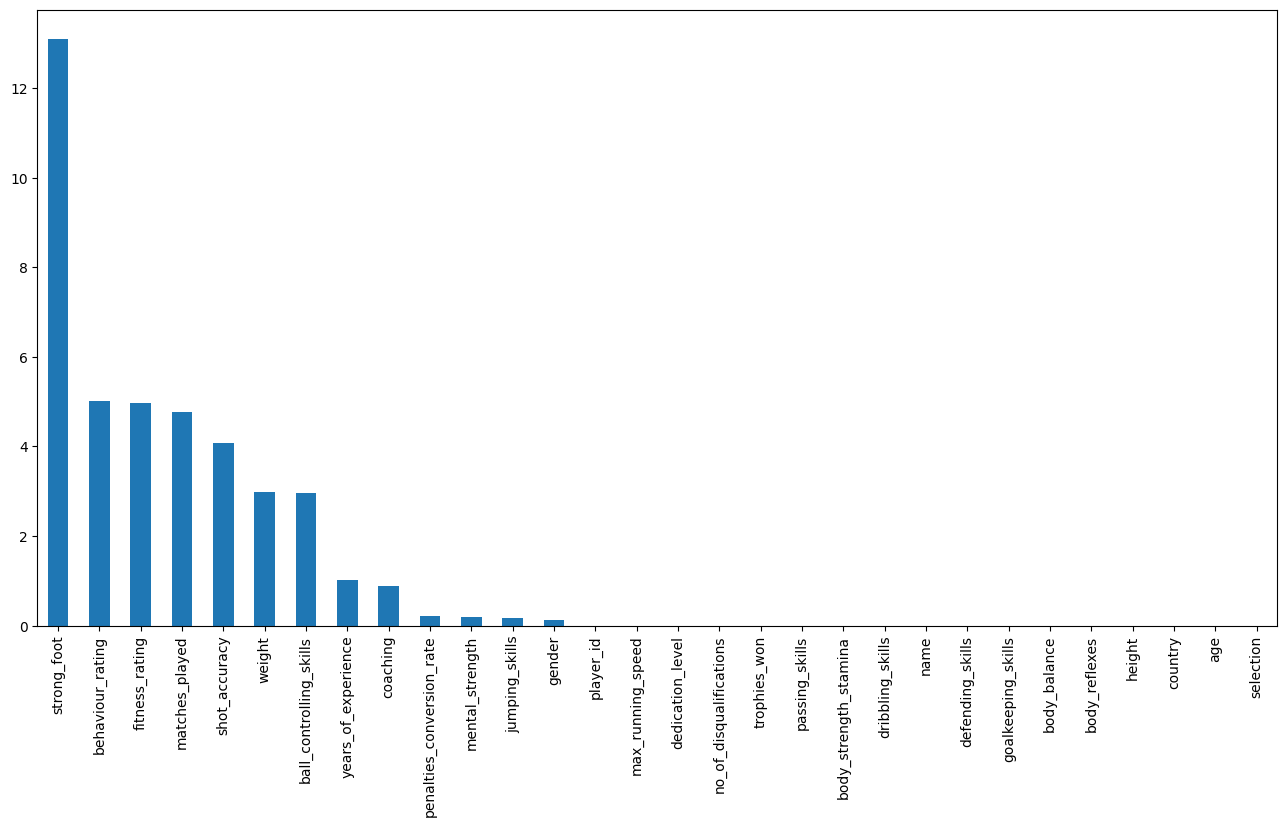

In [8]:
plt.figure(figsize=(16, 8))
(((df.isnull().sum()/len(df))*100).sort_values(ascending=False)).plot(kind='bar')
plt.show()

***out of 29 features 13 features have null values around 12%.***

### Check for outliers

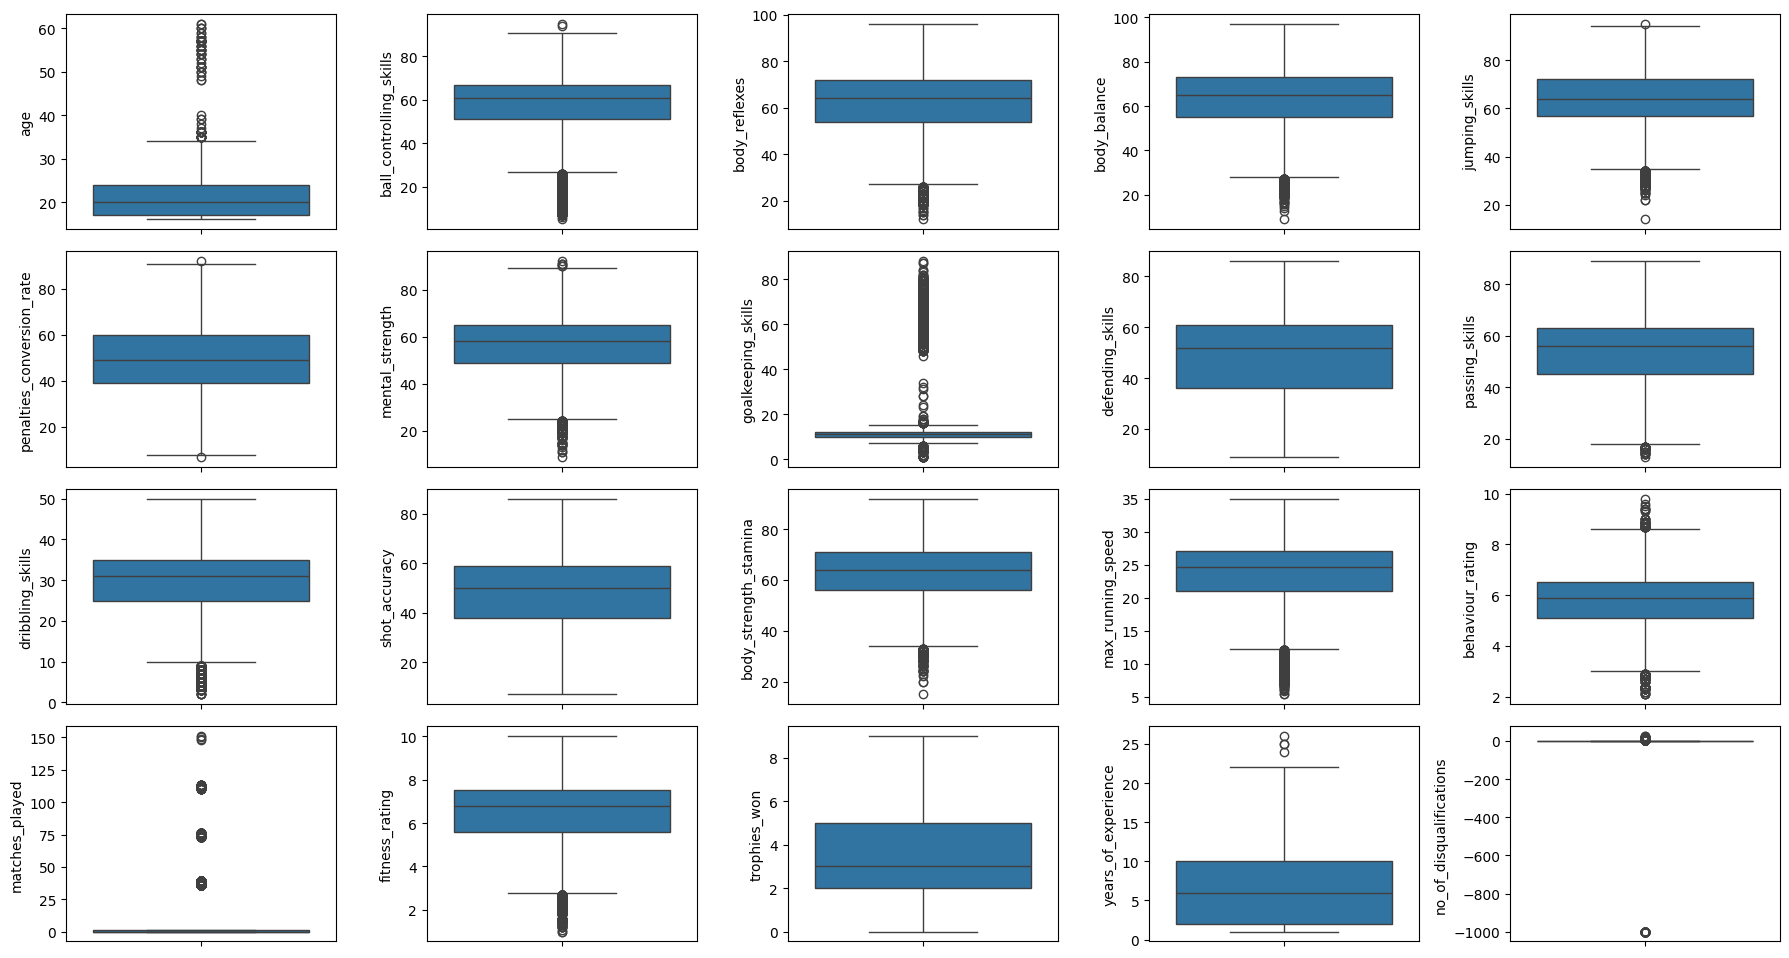

Number of outliers in each feature:
age                           119
ball_controlling_skills      1444
body_reflexes                 208
body_balance                  232
jumping_skills                317
penalties_conversion_rate       2
mental_strength               185
goalkeeping_skills           1705
defending_skills                0
passing_skills                 43
dribbling_skills             1282
shot_accuracy                   0
body_strength_stamina         173
max_running_speed             574
behaviour_rating              142
matches_played               1055
fitness_rating                685
trophies_won                    0
years_of_experience             4
no_of_disqualifications      1176
dtype: int64


In [9]:
numerical_cols = ['age','ball_controlling_skills', 'body_reflexes',
                  'body_balance', 'jumping_skills', 'penalties_conversion_rate',
                  'mental_strength', 'goalkeeping_skills', 'defending_skills',
                  'passing_skills', 'dribbling_skills', 'shot_accuracy',
                  'body_strength_stamina', 'max_running_speed', 'behaviour_rating',
                  'matches_played', 'fitness_rating', 'trophies_won','years_of_experience', 'no_of_disqualifications']

# Create boxplots for each numerical feature
plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(y=df[col])
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# Statistical method using Interquartile Range (IQR)

# Calculate IQR for each numerical feature
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers for each feature
outliers_count = ((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).sum()

# Print number of outliers for each feature
print("Number of outliers in each feature:")
print(outliers_count)

 **Features like ball_controlling_skills, goalkeeping_skills, dribbling_skills, and matches_played have a high number of outliers, indicating that these attributes may have a wider range of values or potential anomalies compared to others.
features, such as defending_skills, shot_accuracy, trophies_won, and years_of_experience, have zero outliers detected. This suggests that the values in these features are within expected ranges or are tightly distributed around their central tendencies.**

### Distribution of features

In [10]:
def percentage_with_hue(plot, feature, Number_of_categories, hue_categories, x_pos=0, y_pos=0, fontsize = 12):
    '''
    This function prints percentage of a barplot when plotted with hue.
    '''
    # get the height of each bar
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            # calculate percentage of the category
            percentage = '{:.2f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            # set the x and y position of the percentage value to look good
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 + x_pos
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() + y_pos
            ax.annotate(percentage, (x, y), fontsize = fontsize)

def percentage_without_hue(ax, feature, x_pos=0, y_pos=0, fontsize = 12 ):
    '''
    This function prints percentage of a barplot when plotted without hue.
    '''
    total = len(feature)
    for p in ax.patches:
        # calculate percentage of the category
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2 + x_pos # To adjust the position of the percentage value
        y = p.get_y() + p.get_height() + y_pos # To adjust the position of the percentage value
        ax.annotate(percentage, (x, y),ha='center', size = fontsize)

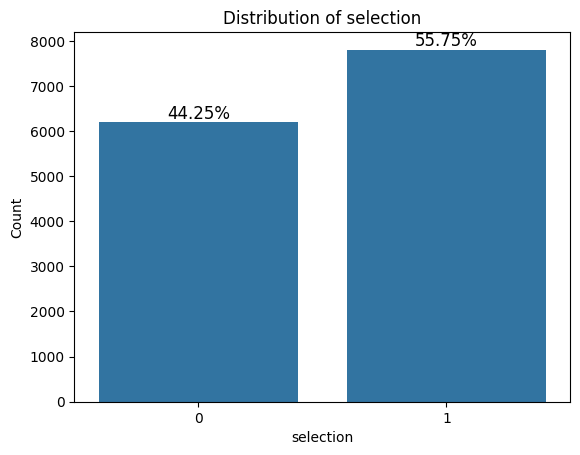

In [13]:
ax=sns.countplot(x='selection',data=df)
plt.title('Distribution of selection')
plt.xlabel('selection')
plt.ylabel('Count')
percentage_without_hue(ax, df['selection'], 0,80,12)
plt.show()

***Inference : Target variable 'selection' is Moderately Imbalanced.55.75% are selected and 44.25% not selected.***

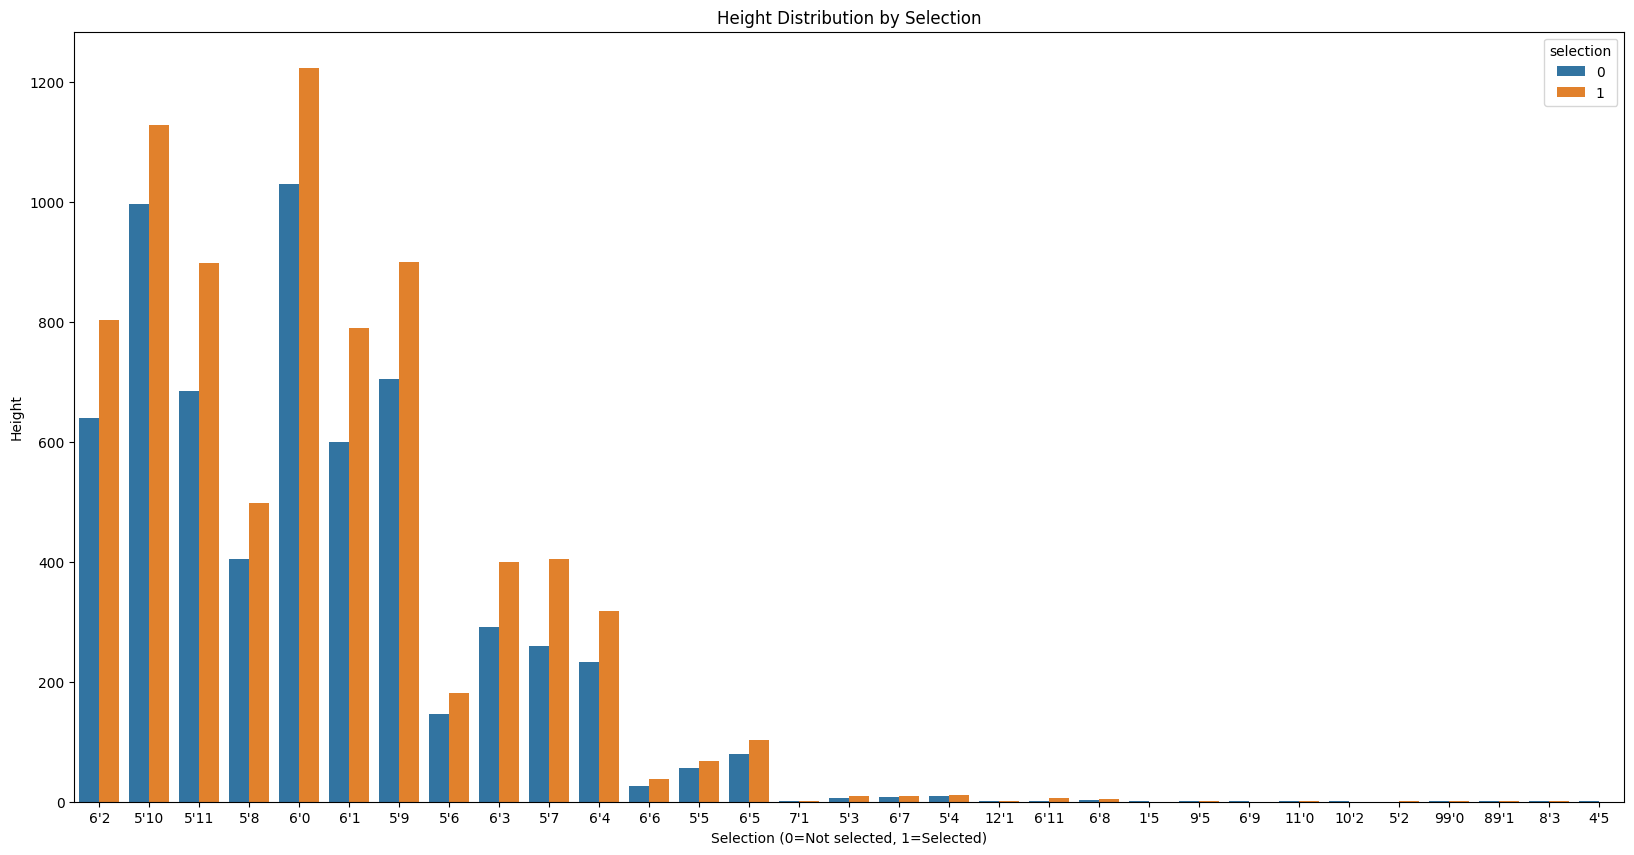

In [14]:
plt.figure(figsize=(20,10))
sns.countplot(x='height', data=df,hue='selection')
plt.title('Height Distribution by Selection')
plt.xlabel('Selection (0=Not selected, 1=Selected)')
plt.ylabel('Height')
plt.show()

**players at 6'0 are mostly selected **


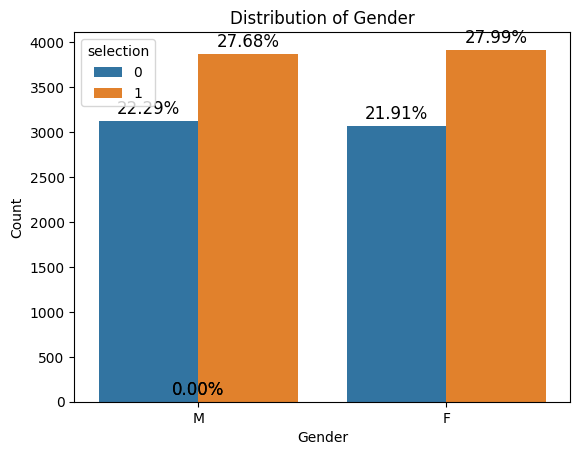

In [15]:
ax=sns.countplot(x='gender',data=df,hue='selection')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
percentage_without_hue(ax, df['gender'], 0,80,12)
plt.show()

**27.68^ male are selected and 27.99  females are selected**

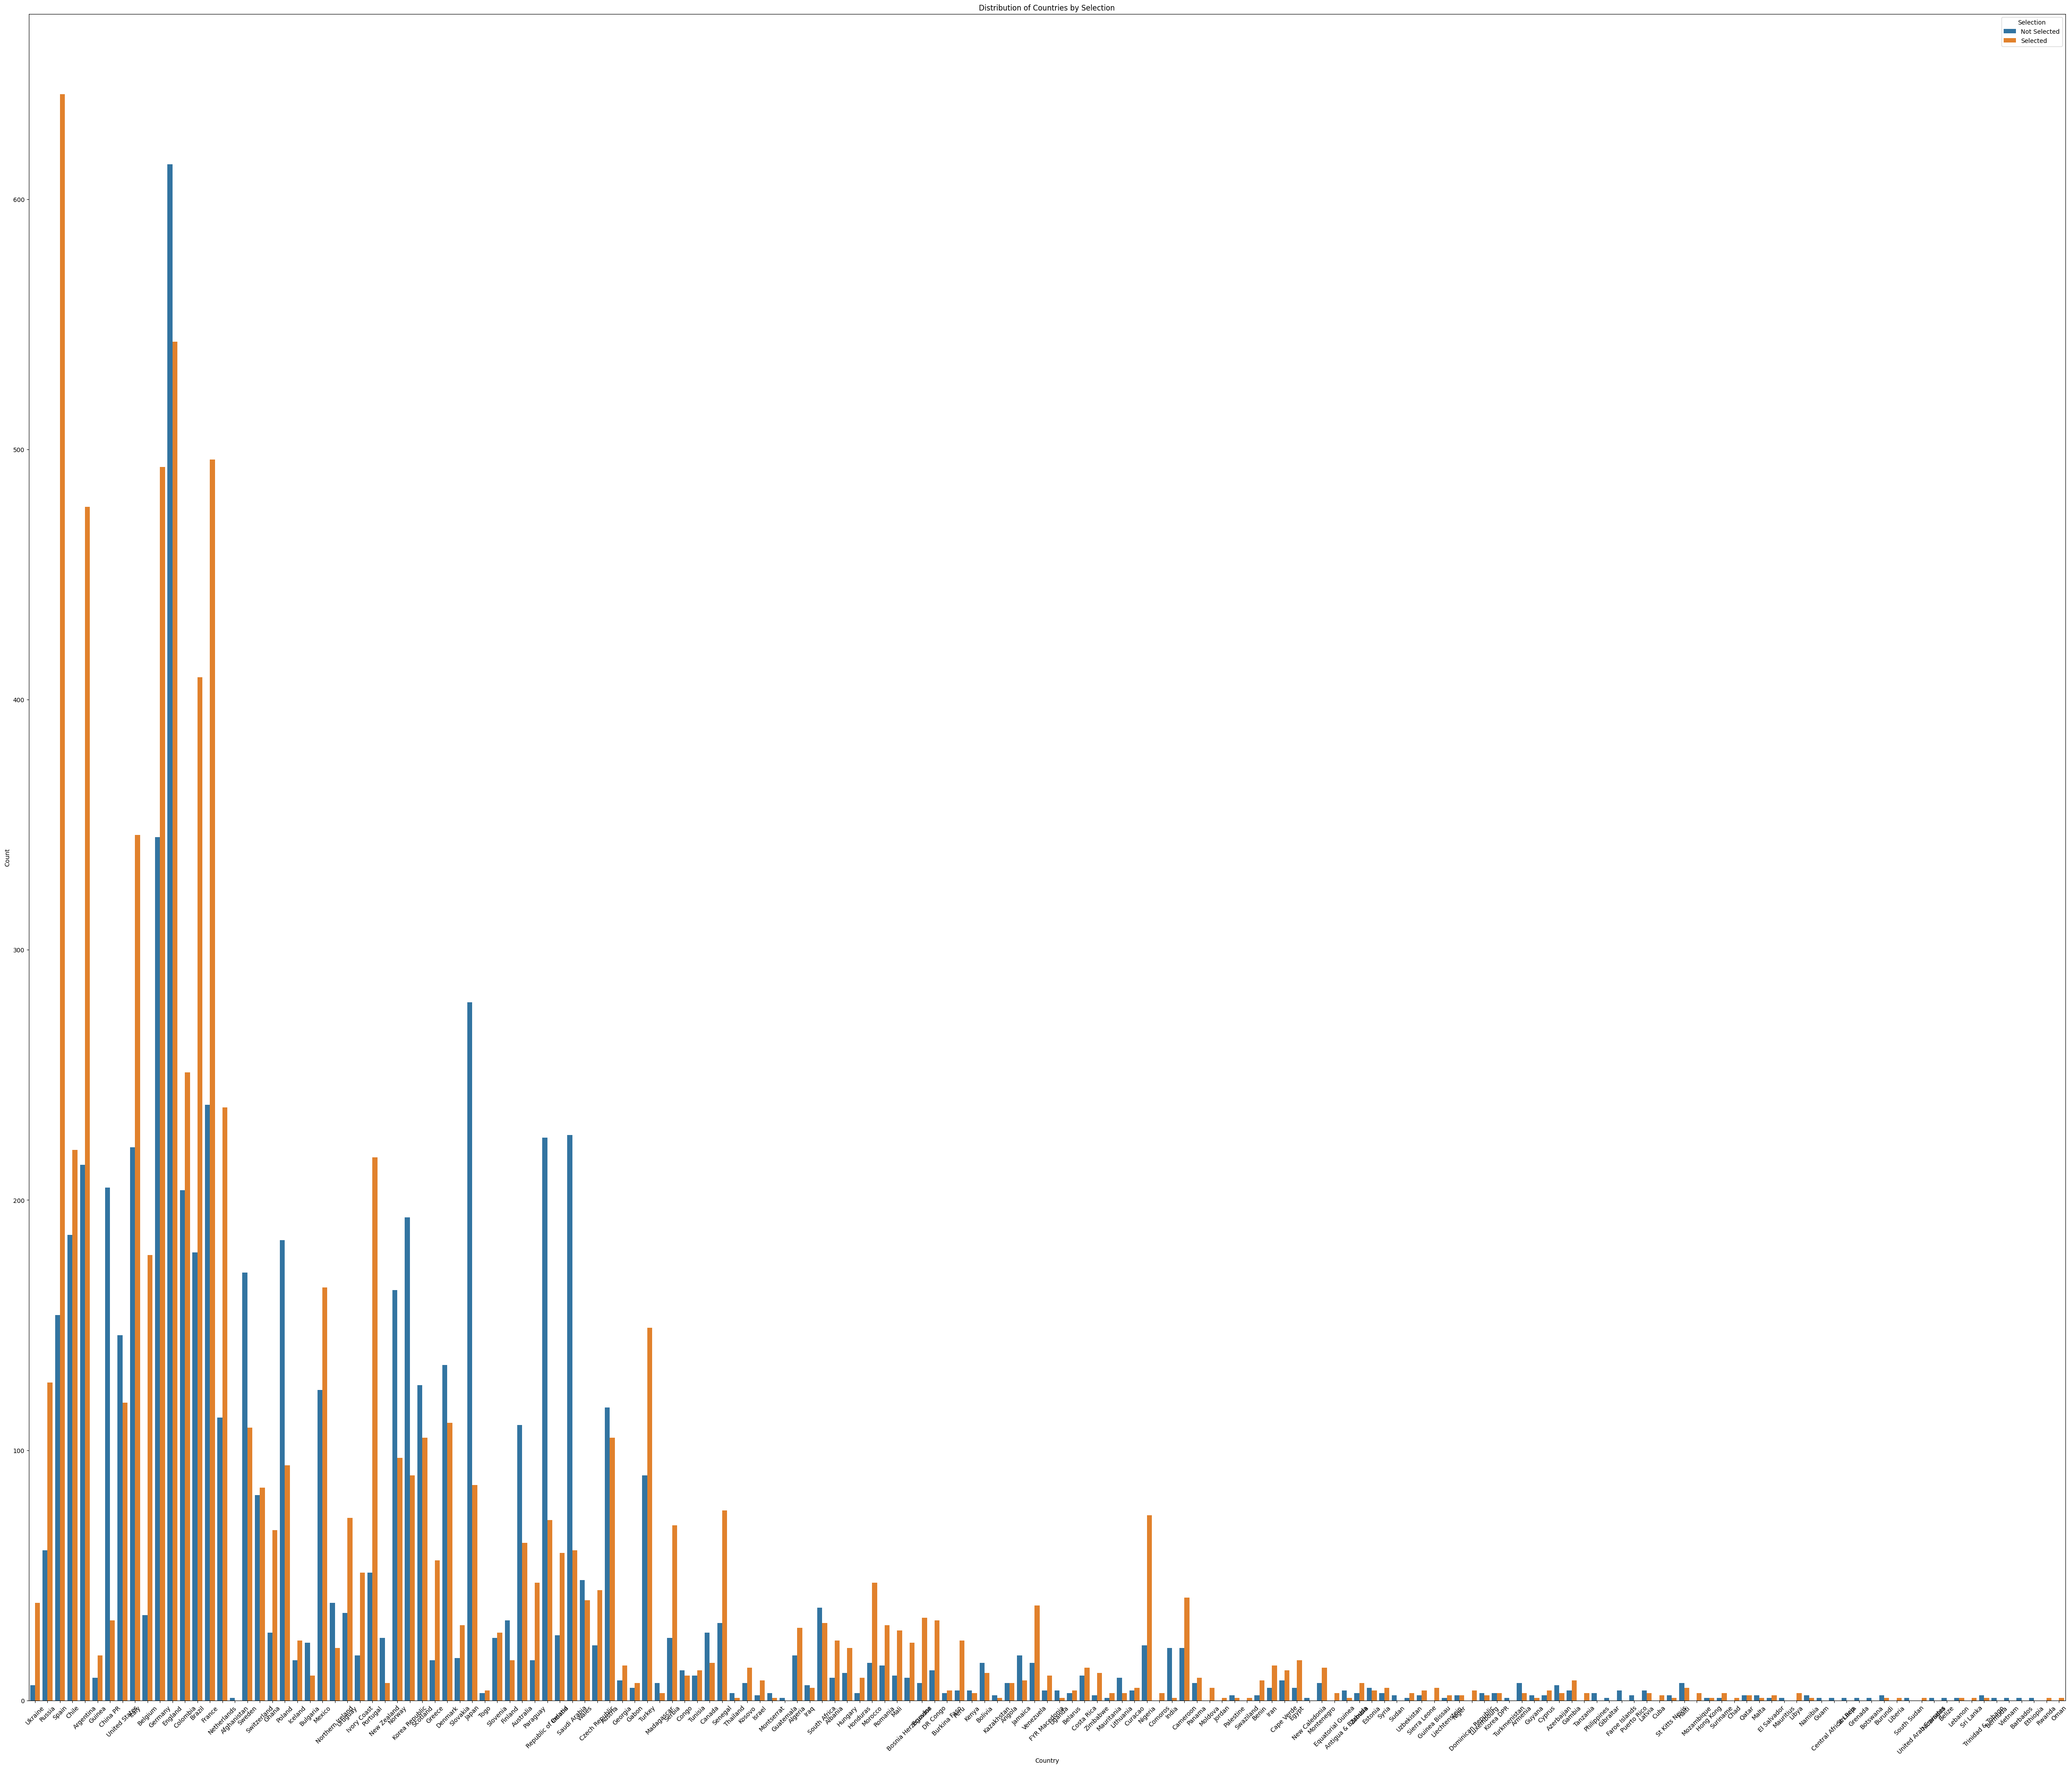

In [16]:
plt.figure(figsize=(60, 50))
sns.countplot(x='country', hue='selection', data=df)
plt.title('Distribution of Countries by Selection')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Selection', labels=['Not Selected', 'Selected'])
plt.show()

## Correlation

# Data Pre - Processing

### Check for null values

In [18]:
df.isnull().sum().sort_values(ascending=False)

strong_foot                  1833
behaviour_rating              703
fitness_rating                695
matches_played                666
shot_accuracy                 572
weight                        417
ball_controlling_skills       413
years_of_experience           144
coaching                      125
penalties_conversion_rate      30
mental_strength                28
jumping_skills                 24
gender                         19
player_id                       0
max_running_speed               0
dedication_level                0
no_of_disqualifications         0
trophies_won                    0
passing_skills                  0
body_strength_stamina           0
dribbling_skills                0
name                            0
defending_skills                0
goalkeeping_skills              0
body_balance                    0
body_reflexes                   0
height                          0
country                         0
age                             0
selection     

In [19]:


# Fill missing values for numeric columns with median
df[numerical_cols] = df[numerical_cols].apply(lambda x: x.fillna(x.median()))

# Impute missing values for categorical columns with mode
categorical_cols = ['gender','strong_foot','weight','coaching']

# Fill missing values for categorical columns with mode
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Verify that missing values have been handled
print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
player_id                    0
name                         0
age                          0
gender                       0
country                      0
height                       0
weight                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
behaviour_rating             0
matches_played               0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
no_of_disqualifications      0
selection                    0
dtype: int64


***All null values are imputed properly.***

Do label encoding in order to convert all categorical features into numerical features

In [20]:
df = pd.get_dummies(df, columns=['country', 'gender', 'strong_foot','coaching','dedication_level','coaching','weight','height'])

***All categorical features are converted to numerical features.***

### Seperating the target (y) and independent variables (x)

In [21]:
X = df.drop(['player_id', 'name', 'selection'], axis=1)
y = df['selection']

### Train test split

Take test size as 0.2 since the size of dataset is medium

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Standard scaling x data

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelling

## K Fold Cross Validation

Since the data is not imbalanced, use k fold cross validation technique

In [24]:
kfold_validator=KFold(10,shuffle=True,random_state=42)

### Logistic Regression

In [25]:
log_reg=LogisticRegression()
cv_result_log_reg=cross_val_score(log_reg,X_train_scaled,y_train,cv=kfold_validator)
print('Average cross validation score of Logistic Regression Model:', cv_result_log_reg.mean())

Average cross validation score of Logistic Regression Model: 0.781866781565173


### Decision Tree

In [26]:
dt_clf=DecisionTreeClassifier()
cv_result_dt_clf=cross_val_score(dt_clf,X_train_scaled,y_train,cv=kfold_validator)
print('Average cross validation score of Decision Tree Model:', cv_result_dt_clf.mean())

Average cross validation score of Decision Tree Model: 0.7931222871186007


### Random Forest

In [27]:
rf_clf=RandomForestClassifier()
cv_result_rf=cross_val_score(rf_clf,X_train_scaled,y_train,cv=kfold_validator)
print('Average cross validation score of Random Forest Model:', cv_result_rf.mean())

Average cross validation score of Random Forest Model: 0.8486827364994255


### KNN

In [28]:
knn=KNeighborsClassifier()
cv_result_knn=cross_val_score(knn,X_train_scaled,y_train,cv=kfold_validator)
print('Average cross validation score of KNN Model:', cv_result_knn.mean())

Average cross validation score of KNN Model: 0.6248331577939487


## Comparison Between Different Classification Models

In [29]:
model=['Logistic Regression','Decision Tree','Random Forest','KNN']
comp_table= pd.DataFrame([[cv_result_log_reg.mean()],[cv_result_dt_clf.mean()],[cv_result_rf.mean()],[cv_result_knn.mean()]],columns=['Average Cross Validation Score'])
comp_table.index=model
comp_table

,Average Cross Validation Score
Logistic Regression,0.781867
Decision Tree,0.793122
Random Forest,0.848683
KNN,0.624833


***Average cross validation score is high for random forest model. So select it for prediction.***

## Prediction

In [30]:
rf_clf.fit(X_train_scaled,y_train)
rf_pred=rf_clf.predict(X_test_scaled)

### Evaluation metrics

In [31]:
metric=['Train Accuracy','Test Accuracy','Precision','Recall','F1 Score']
table= pd.DataFrame([[rf_clf.score(X_train_scaled,y_train)],[accuracy_score(y_test,rf_pred)],[precision_score(y_test,rf_pred)],[recall_score(y_test,rf_pred)],[f1_score(y_test,rf_pred)]],columns=['Random Forest'])
table.index=metric
table

,Random Forest
Train Accuracy,1.000000
Test Accuracy,0.839943
Precision,0.842004
Recall,0.866490
F1 Score,0.854072


***There is small difference between train and test accuracy.

## Hyper Parameter Tuning

In [32]:
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [42]:
CV_rfc = GridSearchCV(estimator=rf_clf, param_grid=param_grid)
CV_rfc.fit(X_train_scaled, y_train)
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 500}

## Prediction with Best Parameters

In [43]:
rf_clf1=RandomForestClassifier(n_estimators=200,max_depth=7,criterion='gini',max_features='log2')
rf_clf1.fit(X_train_scaled,y_train)
rf_pred1=rf_clf.predict(X_test_scaled)

### Evaluation metrics

In [44]:
metric=['Train Accuracy','Test Accuracy','Precision','Recall','F1 Score']
table= pd.DataFrame([[rf_clf1.score(X_train_scaled,y_train)],[accuracy_score(y_test,rf_pred1)],[precision_score(y_test,rf_pred1)],[recall_score(y_test,rf_pred1)],[f1_score(y_test,rf_pred1)]],columns=['Random Forest with Best Parameters'])
table.index=metric
table

,Random Forest with Best Parameters
Train Accuracy,0.794372
Test Accuracy,0.839943
Precision,0.842004
Recall,0.866490
F1 Score,0.854072


***Now train accuracy got reduced and there is no much difference between train and test accuracy. So overfitting avoided. Also test accuracy is slightly higher than train accuracy. So model performs well on unseen data.***

### Confusion Matrix and Classification Report

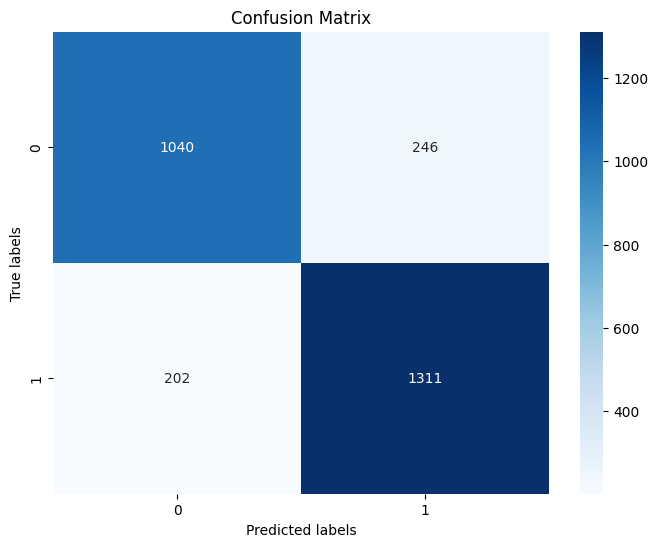

              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1286
           1       0.84      0.87      0.85      1513

    accuracy                           0.84      2799
   macro avg       0.84      0.84      0.84      2799
weighted avg       0.84      0.84      0.84      2799



In [45]:

# Compute confusion matrix
cm = confusion_matrix(y_test,rf_pred1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
report = classification_report(y_test,rf_pred1)
print(report)

***Metric values are good. So model is satisfactory.***